In [32]:
import pandas as pd

In [33]:
restaurante = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')
restaurante.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [34]:
import re
import nltk

# Normalizo el texto

In [35]:
dataset_clean = restaurante.Review.str.lower()
dataset_clean.head()

0                             wow... loved this place.
1                                   crust is not good.
2            not tasty and the texture was just nasty.
3    stopped by during the late may bank holiday of...
4    the selection on the menu was great and so wer...
Name: Review, dtype: object

# Separar las frases en palabras

In [36]:
dataset_clean = dataset_clean.str.split()
dataset_clean.head()

0                        [wow..., loved, this, place.]
1                              [crust, is, not, good.]
2    [not, tasty, and, the, texture, was, just, nas...
3    [stopped, by, during, the, late, may, bank, ho...
4    [the, selection, on, the, menu, was, great, an...
Name: Review, dtype: object

# Palabras que no aportan

In [37]:
## REMOVE STOPWORDS

In [38]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Le digo en qué idioma está el idioma y él se encarga

In [39]:
stop_words = set(stopwords.words('english'))  

In [40]:
filtered_sentence = []
for i in range(len(dataset_clean)):
    filtered_sentence.append(' '.join([w for w in dataset_clean[i] if not w in stop_words]))

Hay que chequear esto, puede quitar palabras claves para la predicción

In [41]:
dataset_end = pd.DataFrame(filtered_sentence,columns = ['Reviews'])

In [42]:
dataset_end

,Reviews
0,wow... loved place.
1,crust good.
2,tasty texture nasty.
3,stopped late may bank holiday rick steve recom...
4,selection menu great prices.
...,...
995,think food flavor texture lacking.
996,appetite instantly gone.
997,overall impressed would go back.
998,"whole experience underwhelming, think we'll go..."


# Lematización - PorterStemmer

In [43]:
dataset_end.iloc[0]

Reviews    wow... loved place.
Name: 0, dtype: object

In [44]:
from nltk.stem.porter import PorterStemmer

In [45]:
list_lema = []
for i in range(len(dataset_end)):
    ps = PorterStemmer()
    list_lema.append([ps.stem(word) for word in dataset_end.iloc[i]][0])

In [46]:
list_lema

['wow... loved place.',
 'crust good.',
 'tasty texture nasty.',
 'stopped late may bank holiday rick steve recommendation loved it.',
 'selection menu great prices.',
 'getting angry want damn pho.',
 'honeslty taste fresh.)',
 'potatoes like rubber could tell made ahead time kept warmer.',
 'fries great too.',
 'great touch.',
 'service prompt.',
 'would go back.',
 'cashier care ever say still ended wayyy overpriced.',
 'tried cape cod ravoli, chicken, cranberry...mmmm!',
 'disgusted pretty sure human hair.',
 'shocked signs indicate cash only.',
 'highly recommended.',
 'waitress little slow service.',
 'place worth time, let alone vegas.',
 'like all.',
 'burrittos blah!',
 'food, amazing.',
 'service also cute.',
 'could care less... interior beautiful.',
 'performed.',
 "that's right....the red velvet cake.....ohhh stuff good.",
 '- never brought salad asked for.',
 'hole wall great mexican street tacos, friendly staff.',
 'took hour get food 4 tables restaurant food luke warm, 

In [47]:
dataset_end

,Reviews
0,wow... loved place.
1,crust good.
2,tasty texture nasty.
3,stopped late may bank holiday rick steve recom...
4,selection menu great prices.
...,...
995,think food flavor texture lacking.
996,appetite instantly gone.
997,overall impressed would go back.
998,"whole experience underwhelming, think we'll go..."


In [48]:
list_lema

['wow... loved place.',
 'crust good.',
 'tasty texture nasty.',
 'stopped late may bank holiday rick steve recommendation loved it.',
 'selection menu great prices.',
 'getting angry want damn pho.',
 'honeslty taste fresh.)',
 'potatoes like rubber could tell made ahead time kept warmer.',
 'fries great too.',
 'great touch.',
 'service prompt.',
 'would go back.',
 'cashier care ever say still ended wayyy overpriced.',
 'tried cape cod ravoli, chicken, cranberry...mmmm!',
 'disgusted pretty sure human hair.',
 'shocked signs indicate cash only.',
 'highly recommended.',
 'waitress little slow service.',
 'place worth time, let alone vegas.',
 'like all.',
 'burrittos blah!',
 'food, amazing.',
 'service also cute.',
 'could care less... interior beautiful.',
 'performed.',
 "that's right....the red velvet cake.....ohhh stuff good.",
 '- never brought salad asked for.',
 'hole wall great mexican street tacos, friendly staff.',
 'took hour get food 4 tables restaurant food luke warm, 

In [49]:
dataset_end

,Reviews
0,wow... loved place.
1,crust good.
2,tasty texture nasty.
3,stopped late may bank holiday rick steve recom...
4,selection menu great prices.
...,...
995,think food flavor texture lacking.
996,appetite instantly gone.
997,overall impressed would go back.
998,"whole experience underwhelming, think we'll go..."


# CONVERSIÓN A VECTORES : BAG OF WORDS,TFIDF...

In [74]:
len(X)

1974

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

 Mide con qué frecuencia aparece un término o frase dentro de un documento determinado, y lo compara con el número de documentos que mencionan ese  término dentro de una colección entera de documentos

saca una dimensión de 3 filas correspondientes a cada pablabra, los ordena alfabéticamente. Cada columna corresponde al True o False de si aparece la pabla que hemos metido o no 

saca una dimensión de 3 filas correspondientes a cada pablabra, los ordena alfabéticamente. Cada columna corresponde al True o False de si aparece la pabla que hemos metido o no 

In [85]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(list_lema).toarray()

In [86]:
list_lema

['wow... loved place.',
 'crust good.',
 'tasty texture nasty.',
 'stopped late may bank holiday rick steve recommendation loved it.',
 'selection menu great prices.',
 'getting angry want damn pho.',
 'honeslty taste fresh.)',
 'potatoes like rubber could tell made ahead time kept warmer.',
 'fries great too.',
 'great touch.',
 'service prompt.',
 'would go back.',
 'cashier care ever say still ended wayyy overpriced.',
 'tried cape cod ravoli, chicken, cranberry...mmmm!',
 'disgusted pretty sure human hair.',
 'shocked signs indicate cash only.',
 'highly recommended.',
 'waitress little slow service.',
 'place worth time, let alone vegas.',
 'like all.',
 'burrittos blah!',
 'food, amazing.',
 'service also cute.',
 'could care less... interior beautiful.',
 'performed.',
 "that's right....the red velvet cake.....ohhh stuff good.",
 '- never brought salad asked for.',
 'hole wall great mexican street tacos, friendly staff.',
 'took hour get food 4 tables restaurant food luke warm, 

In [78]:
len(X)

1000

In [54]:
print(cv.get_feature_names_out())

['00' '10' '100' ... 'yum' 'yummy' 'zero']


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(list_lema)
print(vectorizer.get_feature_names_out())

# Train y Test 

In [59]:
from sklearn.model_selection import train_test_split

In [87]:
y = restaurante['Liked']

In [88]:
print(X.shape)
print(y.shape)

(1000, 1500)
(1000,)


In [89]:
X_train, X_test, y_train, y_test = train_test_split (X, 
                                                     y,
                                                     test_size = 0.2,
                                                     random_state = 0,
                                                     stratify = y)

In [91]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(max_iter=10000).fit(X_train, y_train)
pred = modelo.predict(X_test)

# Saca métricas

In [96]:
def saca_metricas(y_real, y_pred): 
    false_positive_rate, recall, thresholds = roc_curve(y_real, y_pred)
    roc_auc = auc(false_positive_rate, recall)
    print('- AUC: {roc_auc}')
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)

- AUC: {roc_auc}


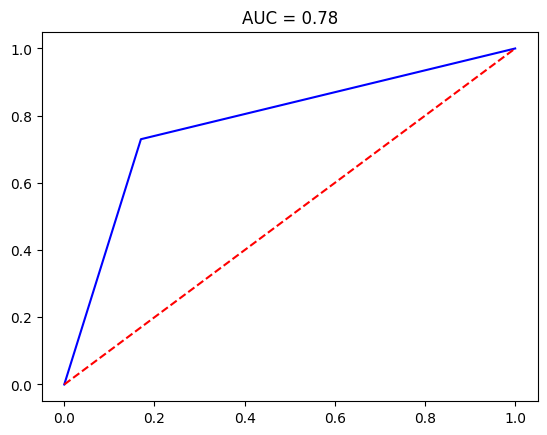

In [97]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, classification_report
import matplotlib.pyplot as plt

saca_metricas(y_test, pred)